# EXERCISE 3-1
## Decision Tree Prediction Modeling
### 목적 : 소매업 회사가 고객 각각을 대상으로 광고인쇄물 발송여부 조사

In [288]:
import pandas as pd
import numpy as np

#### 1.1. 데이터 불러오기 및 테이블 확인

In [289]:
df=pd.read_csv("BUYTEST.csv")
print(df)

             ID  RESPOND     AGE  INCOME  SEX MARRIED FICO OWNHOME LOC  \
0       1371057        0      71      67    M       1  719       0   A   
1       2093270        0      53      72    M       1  751       0   A   
2       2783726        0      53      70    F       1  725       0   A   
3      10800860        0      45      56    F       0  684       0   A   
4      14577797        0      32      66    F       0  651       0   A   
5      15884859        0      35      48    F       0  691       1   A   
6      17131376        0      43      49    F       0  694       1   A   
7      18674857        0      39      64    M       0  659       0   A   
8      19417226        0      66      65    M       0  692       0   A   
9      21786286        0  $null$  $null$  NaN  $null$  707  $null$   A   
10     26897464        0      52      58    M       1  705       1   A   
11     28908796        0      29      40    F       0  693       0   A   
12     31053878        0      48      

#### 1.2. 데이터 기술통계량 확인

<<DESCRIBE>>
            RESPOND       CLIMATE          BUY6         BUY12         BUY18  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.076700     20.343000      0.128300      0.209900      0.347100   
std        0.266128      6.108689      0.346195      0.436648      0.570661   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%        0.000000     20.000000      0.000000      0.000000      0.000000   
50%        0.000000     20.000000      0.000000      0.000000      0.000000   
75%        0.000000     20.000000      0.000000      0.000000      1.000000   
max        1.000000     30.000000      2.000000      3.000000      3.000000   

              BUY24       DISCBUY      RETURN24          COA6            C1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     254.045100      0.270000      0.070900      0.028900      0.155300   
std      153.422061      0.443982     

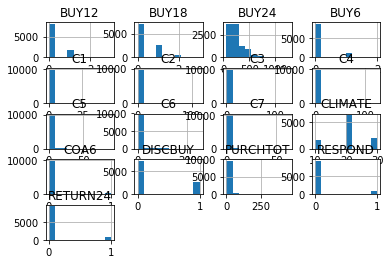

In [290]:
def skimming(df):
    print("<<DESCRIBE>>")
    print(df.describe())
    print("\n<<SKEWNESS>>")
    print(df.skew())
    print("\n<<KURTOSIS>>")
    print(df.kurtosis())
    print("\n<<MISSING>>")
    print(df.isna().sum())
    print("\n<<HISTOGRAM>>")
    df.hist()

skimming(df)

#### 1.3. 결측값 처리

In [291]:
devil = df['AGE'][9]
print(devil)

$null$


In [292]:
for i in range(len(df)):
    for n in range(len(df.columns)):
        if df.iloc[i,n]==devil :
            df.iloc[i,n] = np.nan
            
print(df)

             ID  RESPOND  AGE INCOME  SEX MARRIED FICO OWNHOME LOC  CLIMATE  \
0       1371057        0   71     67    M       1  719       0   A       10   
1       2093270        0   53     72    M       1  751       0   A       10   
2       2783726        0   53     70    F       1  725       0   A       10   
3      10800860        0   45     56    F       0  684       0   A       10   
4      14577797        0   32     66    F       0  651       0   A       10   
5      15884859        0   35     48    F       0  691       1   A       10   
6      17131376        0   43     49    F       0  694       1   A       10   
7      18674857        0   39     64    M       0  659       0   A       10   
8      19417226        0   66     65    M       0  692       0   A       10   
9      21786286        0  NaN    NaN  NaN     NaN  707     NaN   A       10   
10     26897464        0   52     58    M       1  705       1   A       10   
11     28908796        0   29     40    F       0  6

In [293]:
# df['AGE'].mean(skipna=True)
df['AGE'] = df['AGE'].astype('float')
df['INCOME'] = df['INCOME'].astype('float')
df['FICO'] = df['FICO'].astype('float')

df['AGE'] = df['AGE'].fillna(df[df['AGE'].notna()]['AGE'].mean()).round(0)
df['INCOME'] = df['INCOME'].fillna(df[ df['INCOME'].notna()]['INCOME'].mean()).round(0)
df['FICO'] = df['FICO'].fillna(df[ df['FICO'].notna()]['FICO'].mean()).round(0)

df['SEX']=df.SEX.fillna(df.SEX.mode()[0])
df['MARRIED']=df.MARRIED.fillna(df.MARRIED.mode()[0])
df['OWNHOME']=df.OWNHOME.fillna(df.OWNHOME.mode()[0])
df['ORGSRC']=df.ORGSRC.fillna(df.ORGSRC.mode()[0])

In [296]:
df.loc[df.SEX == 'M', 'SEX'] = 1
df.loc[df.SEX == 'F', 'SEX'] = 0
df['LOC']=df['LOC'].apply(lambda s : ord(s))
df['ORGSRC']=df['ORGSRC'].apply(lambda s : ord(s))

TypeError: ord() expected string of length 1, but int found

In [297]:
print(df)

             ID  RESPOND   AGE  INCOME  SEX MARRIED   FICO OWNHOME  LOC  \
0       1371057        0  71.0    67.0    1       1  719.0       0   65   
1       2093270        0  53.0    72.0    1       1  751.0       0   65   
2       2783726        0  53.0    70.0    0       1  725.0       0   65   
3      10800860        0  45.0    56.0    0       0  684.0       0   65   
4      14577797        0  32.0    66.0    0       0  651.0       0   65   
5      15884859        0  35.0    48.0    0       0  691.0       1   65   
6      17131376        0  43.0    49.0    0       0  694.0       1   65   
7      18674857        0  39.0    64.0    1       0  659.0       0   65   
8      19417226        0  66.0    65.0    1       0  692.0       0   65   
9      21786286        0  45.0    48.0    1       1  707.0       0   65   
10     26897464        0  52.0    58.0    1       1  705.0       1   65   
11     28908796        0  29.0    40.0    0       0  693.0       0   65   
12     31053878        0 

#### 1.4. 변수간 상관관계 확인

           RESPOND       AGE    INCOME       SEX      FICO       LOC  \
RESPOND   1.000000 -0.069586 -0.012645 -0.004302 -0.040564 -0.020051   
AGE      -0.069586  1.000000 -0.006128  0.011322 -0.006303 -0.021028   
INCOME   -0.012645 -0.006128  1.000000  0.217348 -0.004070 -0.067312   
SEX      -0.004302  0.011322  0.217348  1.000000 -0.010273 -0.037639   
FICO     -0.040564 -0.006303 -0.004070 -0.010273  1.000000  0.018414   
LOC      -0.020051 -0.021028 -0.067312 -0.037639  0.018414  1.000000   
CLIMATE  -0.033409 -0.015437 -0.059271 -0.041152  0.014772  0.723790   
BUY6      0.020184 -0.016005 -0.006467 -0.006424  0.007911 -0.001346   
BUY12     0.033571 -0.021937 -0.004431 -0.010019 -0.001416  0.007638   
BUY18     0.088753 -0.029540 -0.005639 -0.003829 -0.013519  0.010892   
BUY24     0.062136 -0.025547 -0.049324 -0.005264 -0.030817  0.170450   
ORGSRC    0.017342 -0.009815 -0.007215  0.008241  0.019196 -0.000289   
DISCBUY  -0.009387 -0.005588  0.012990 -0.002704 -0.006942  0.02

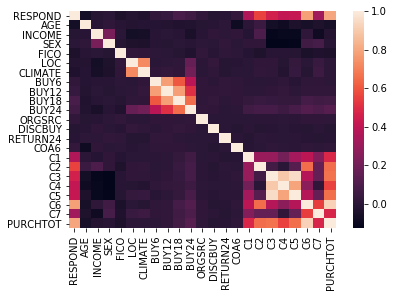

In [298]:
import seaborn as sns

corr_matrix=df.corr()

sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)
print(corr_matrix)

#### 1.5. 변수 유형 설정

In [299]:
# df.MARRIED=df['MARRIED'].astype(float)
# df.RESPOND=df['RESPOND'].astype(float)
# df.OWNHOME=df['OWNHOME'].astype(float)
# df.RETURN24=df['RETURN24'].astype(float)
# df.CLIMATE=df['CLIMATE'].astype(str)
# df.DISCBUY=df['DISCBUY'].astype(str)
# df.COA6=df['COA6'].astype(str)
# print(df)


#### 1.6. 변수 선택

In [300]:
df=df.drop(columns=['ID','C1','C2','C3','C4','C5','C6','C7','PURCHTOT'])
print(df)

      RESPOND   AGE  INCOME  SEX MARRIED   FICO OWNHOME  LOC  CLIMATE  BUY6  \
0           0  71.0    67.0    1       1  719.0       0   65       10     1   
1           0  53.0    72.0    1       1  751.0       0   65       10     0   
2           0  53.0    70.0    0       1  725.0       0   65       10     1   
3           0  45.0    56.0    0       0  684.0       0   65       10     0   
4           0  32.0    66.0    0       0  651.0       0   65       10     0   
5           0  35.0    48.0    0       0  691.0       1   65       10     0   
6           0  43.0    49.0    0       0  694.0       1   65       10     0   
7           0  39.0    64.0    1       0  659.0       0   65       10     0   
8           0  66.0    65.0    1       0  692.0       0   65       10     0   
9           0  45.0    48.0    1       1  707.0       0   65       10     0   
10          0  52.0    58.0    1       1  705.0       1   65       10     0   
11          0  29.0    40.0    0       0  693.0     

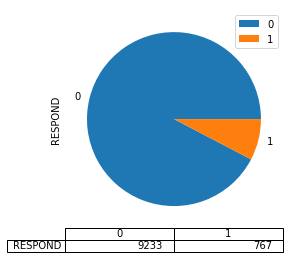

In [301]:
df.RESPOND.value_counts().plot.pie(legend=True,table=True)

#### 1.7. 데이터셋 분리

2999
7001


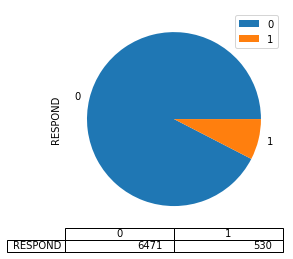

In [302]:
mask = np.random.rand(len(df)) < 0.7
train = df[mask]
test = df[~mask]
print(len(test))
print(len(train))

train.RESPOND.value_counts().plot.pie(legend=True, table=True)

#### 1.8. 밸런싱

In [303]:
test

,RESPOND,AGE,INCOME,SEX,MARRIED,FICO,OWNHOME,LOC,CLIMATE,BUY6,BUY12,BUY18,BUY24,ORGSRC,DISCBUY,RETURN24,COA6
0,0,71.0,67.0,1,1,719.0,0,65,10,1,1,1,318,79,1,0,0
4,0,32.0,66.0,0,0,651.0,0,65,10,0,0,0,161,82,0,0,0
9,0,45.0,48.0,1,1,707.0,0,65,10,0,0,0,198,79,0,0,0
11,0,29.0,40.0,0,0,693.0,0,65,10,0,0,0,118,67,0,0,0
12,0,48.0,57.0,0,0,698.0,0,65,10,0,0,0,226,79,0,1,0
18,0,36.0,51.0,1,0,610.0,0,65,10,0,0,0,189,79,1,0,0
19,0,23.0,52.0,0,1,670.0,0,65,10,0,0,0,412,67,0,0,0
25,0,55.0,51.0,0,1,706.0,0,65,10,0,0,1,283,68,0,0,0
27,0,49.0,19.0,0,1,687.0,0,65,10,0,0,1,349,85,1,0,0
29,0,54.0,35.0,0,1,720.0,0,65,10,0,0,0,76,79,0,0,0


In [304]:
import pandas_ml as pdml
from imblearn.over_sampling import SMOTE

In [305]:
x_train = train.loc[:,df.columns != 'RESPOND'].values
y_train = train.loc[:,df.columns == 'RESPOND'].values
x_test = test.loc[:,df.columns != 'RESPOND'].values
y_test = test.loc[:,df.columns == 'RESPOND'].values

In [306]:
sm = SMOTE()
x_res,y_res = sm.fit_resample(x_train,y_train.ravel())

In [310]:
from sklearn.tree import DecisionTreeClassifier as dtc
md = dtc(criterion="entropy")
md.fit(x_res,y_res)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [311]:
y_pred = md.predict(x_test)

In [312]:
from sklearn.metrics import confusion_matrix as cm
conf=cm(y_test,y_pred)
conf

array([[2540,  222],
       [ 194,   43]], dtype=int64)

In [330]:
print("모델1 정확도 : ",(float(conf[0][0]+conf[1][1])/sum(sum(conf))).round(4)*100,"%")

모델1 정확도 :  86.13 %


In [335]:
md2 = dtc(criterion='gini')
md2.fit(x_res,y_res)
y_pred2 = md2.predict(x_test)
conf2=cm(y_test,y_pred2)
conf2
print("모델2 정확도 : ",(float(conf2[0][0]+conf2[1][1])/sum(sum(conf2))).round(4)*100,"%")

모델2 정확도 :  85.83 %


# EXERCISE 3-2

In [418]:
df=pd.read_excel('CallsData.xls')
df2=pd.read_csv('ContractData.csv')

In [419]:
df=pd.merge(df,df2,on=['Area Code','Phone'])

<<DESCRIBE>>
       VMail Message     Day Mins     Eve Mins   Night Mins    Intl Mins  \
count    3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean        8.099010   179.775098   200.980348   200.872037    10.237294   
std        13.688365    54.467389    50.713844    50.573847     2.791840   
min         0.000000     0.000000     0.000000    23.200000     0.000000   
25%         0.000000   143.700000   166.600000   167.000000     8.500000   
50%         0.000000   179.400000   201.400000   201.200000    10.300000   
75%        20.000000   216.400000   235.300000   235.300000    12.100000   
max        51.000000   350.800000   363.700000   395.000000    20.000000   

       CustServ Calls    Day Calls   Day Charge    Eve Calls   Eve Charge  \
count     3333.000000  3333.000000  3333.000000  3333.000000  3333.000000   
mean         1.562856   100.435644    30.562307   100.114311    17.083540   
std          1.315491    20.069084     9.259435    19.922625     4.3106

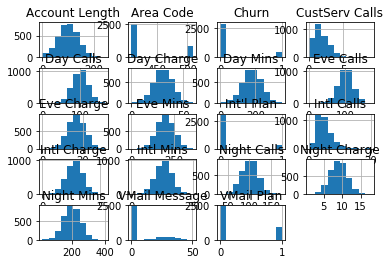

In [420]:
skimming(df)

In [421]:
#도저히 처리할 방법이 떠오르지 않아 State를 제거합니다
df.drop(['Phone','Account Length','State'],axis=1,inplace=True)
print(df)

      VMail Message  Day Mins  Eve Mins  Night Mins  Intl Mins  \
0                25     265.1     197.4       244.7       10.0   
1                26     161.6     195.5       254.4       13.7   
2                 0     243.4     121.2       162.6       12.2   
3                 0     299.4      61.9       196.9        6.6   
4                 0     166.7     148.3       186.9       10.1   
5                 0     223.4     220.6       203.9        6.3   
6                24     218.2     348.5       212.6        7.5   
7                 0     157.0     103.1       211.8        7.1   
8                 0     184.5     351.6       215.8        8.7   
9                37     258.6     222.0       326.4       11.2   
10                0     129.1     228.5       208.8       12.7   
11                0     187.7     163.4       196.0        9.1   
12                0     128.8     104.9       141.1       11.2   
13                0     156.6     247.6       192.3       12.3   
14        

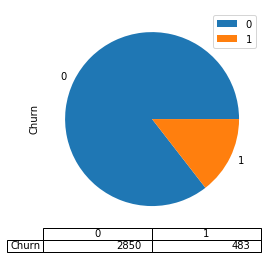

In [422]:
df.Churn.value_counts().plot.pie(legend=True, table=True)

674
2659


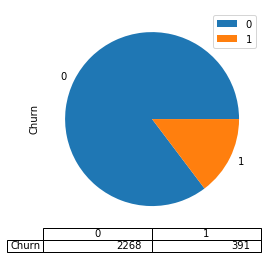

In [423]:
mask = np.random.rand(len(df)) < 0.8
train = df[mask]
test = df[~mask]
print(len(test))
print(len(train))

train.Churn.value_counts().plot.pie(legend=True, table=True)

In [427]:
# from imblearn.over_sampling import SOMTE
x_train = train.loc[:,df.columns != 'Churn'].values
y_train = train.loc[:,df.columns == 'Churn'].values
x_test = test.loc[:,df.columns != 'Churn'].values
y_test = test.loc[:,df.columns == 'Churn'].values
# sm = SMOTE()
# x_res,y_res = sm.fit_resample(x_train,y_train.ravel())

In [430]:
sm=SMOTE()
x_train_res,y_train_res = sm.fit_resample(x_train,y_train.ravel())

In [431]:
md=dtc(criterion='gini',min_samples_split=6)
md.fit(x_train_res,y_train_res)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [435]:
y_pred=md.predict(x_test)
conf = cm(y_test,y_pred)
conf

array([[541,  41],
       [ 21,  71]], dtype=int64)

In [436]:
print("모델 정확도 : ",(float(conf[0][0]+conf[1][1])/sum(sum(conf))).round(4)*100,"%")

모델 정확도 :  90.8 %
